In [10]:
import pandas as pd
from ams_utilities import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from matplotlib._png import read_png
import os
%matplotlib notebook

In [12]:
df=pd.read_csv('E:\Jake\morph_PCA.csv',index_col=0)
df

,AS016: Cell1,AS016: Cell2,AS029: Cell1,AS030: Cell1,AS036: Cell1,AS038: Cell1,AS039: Cell1,AS040: Cell1,AS045: Cell1,AS049: Cell1,...,AS276: Cell2,AS277: Cell1,AS277: Cell2,AS277: Cell3,AS278: Cell2,AS278: Cell3,AS278: Cell4,AS278: Cell5,AS279: Cell1,AS280: Cell2
PC1,-0.330378,0.050885,0.710689,-0.304610,-0.170273,-0.004269,-0.335205,-0.151393,-0.006715,0.249125,...,-0.475396,-0.647809,-0.590422,-0.347690,-0.350971,-0.668684,-0.521544,-0.752590,-0.506801,-0.759123
PC2,0.033194,-0.122944,-0.120601,-0.041963,0.092105,0.041851,0.049562,-0.079677,-0.157816,-0.050262,...,-0.011015,0.166477,0.026769,0.016939,0.109464,0.033375,0.109137,-0.015519,-0.020836,0.085465


In [13]:
files=os.walk(r'\\163.1.248.177\jswann\Morphologies\Vectorised Reconstruction Images\PNGs')
paths=[]
for root,dirs,file in files:
    for name in file:
        paths.append(str(root)+'\\'+str(name))
len(paths)

78

<IPython.core.display.Javascript object>


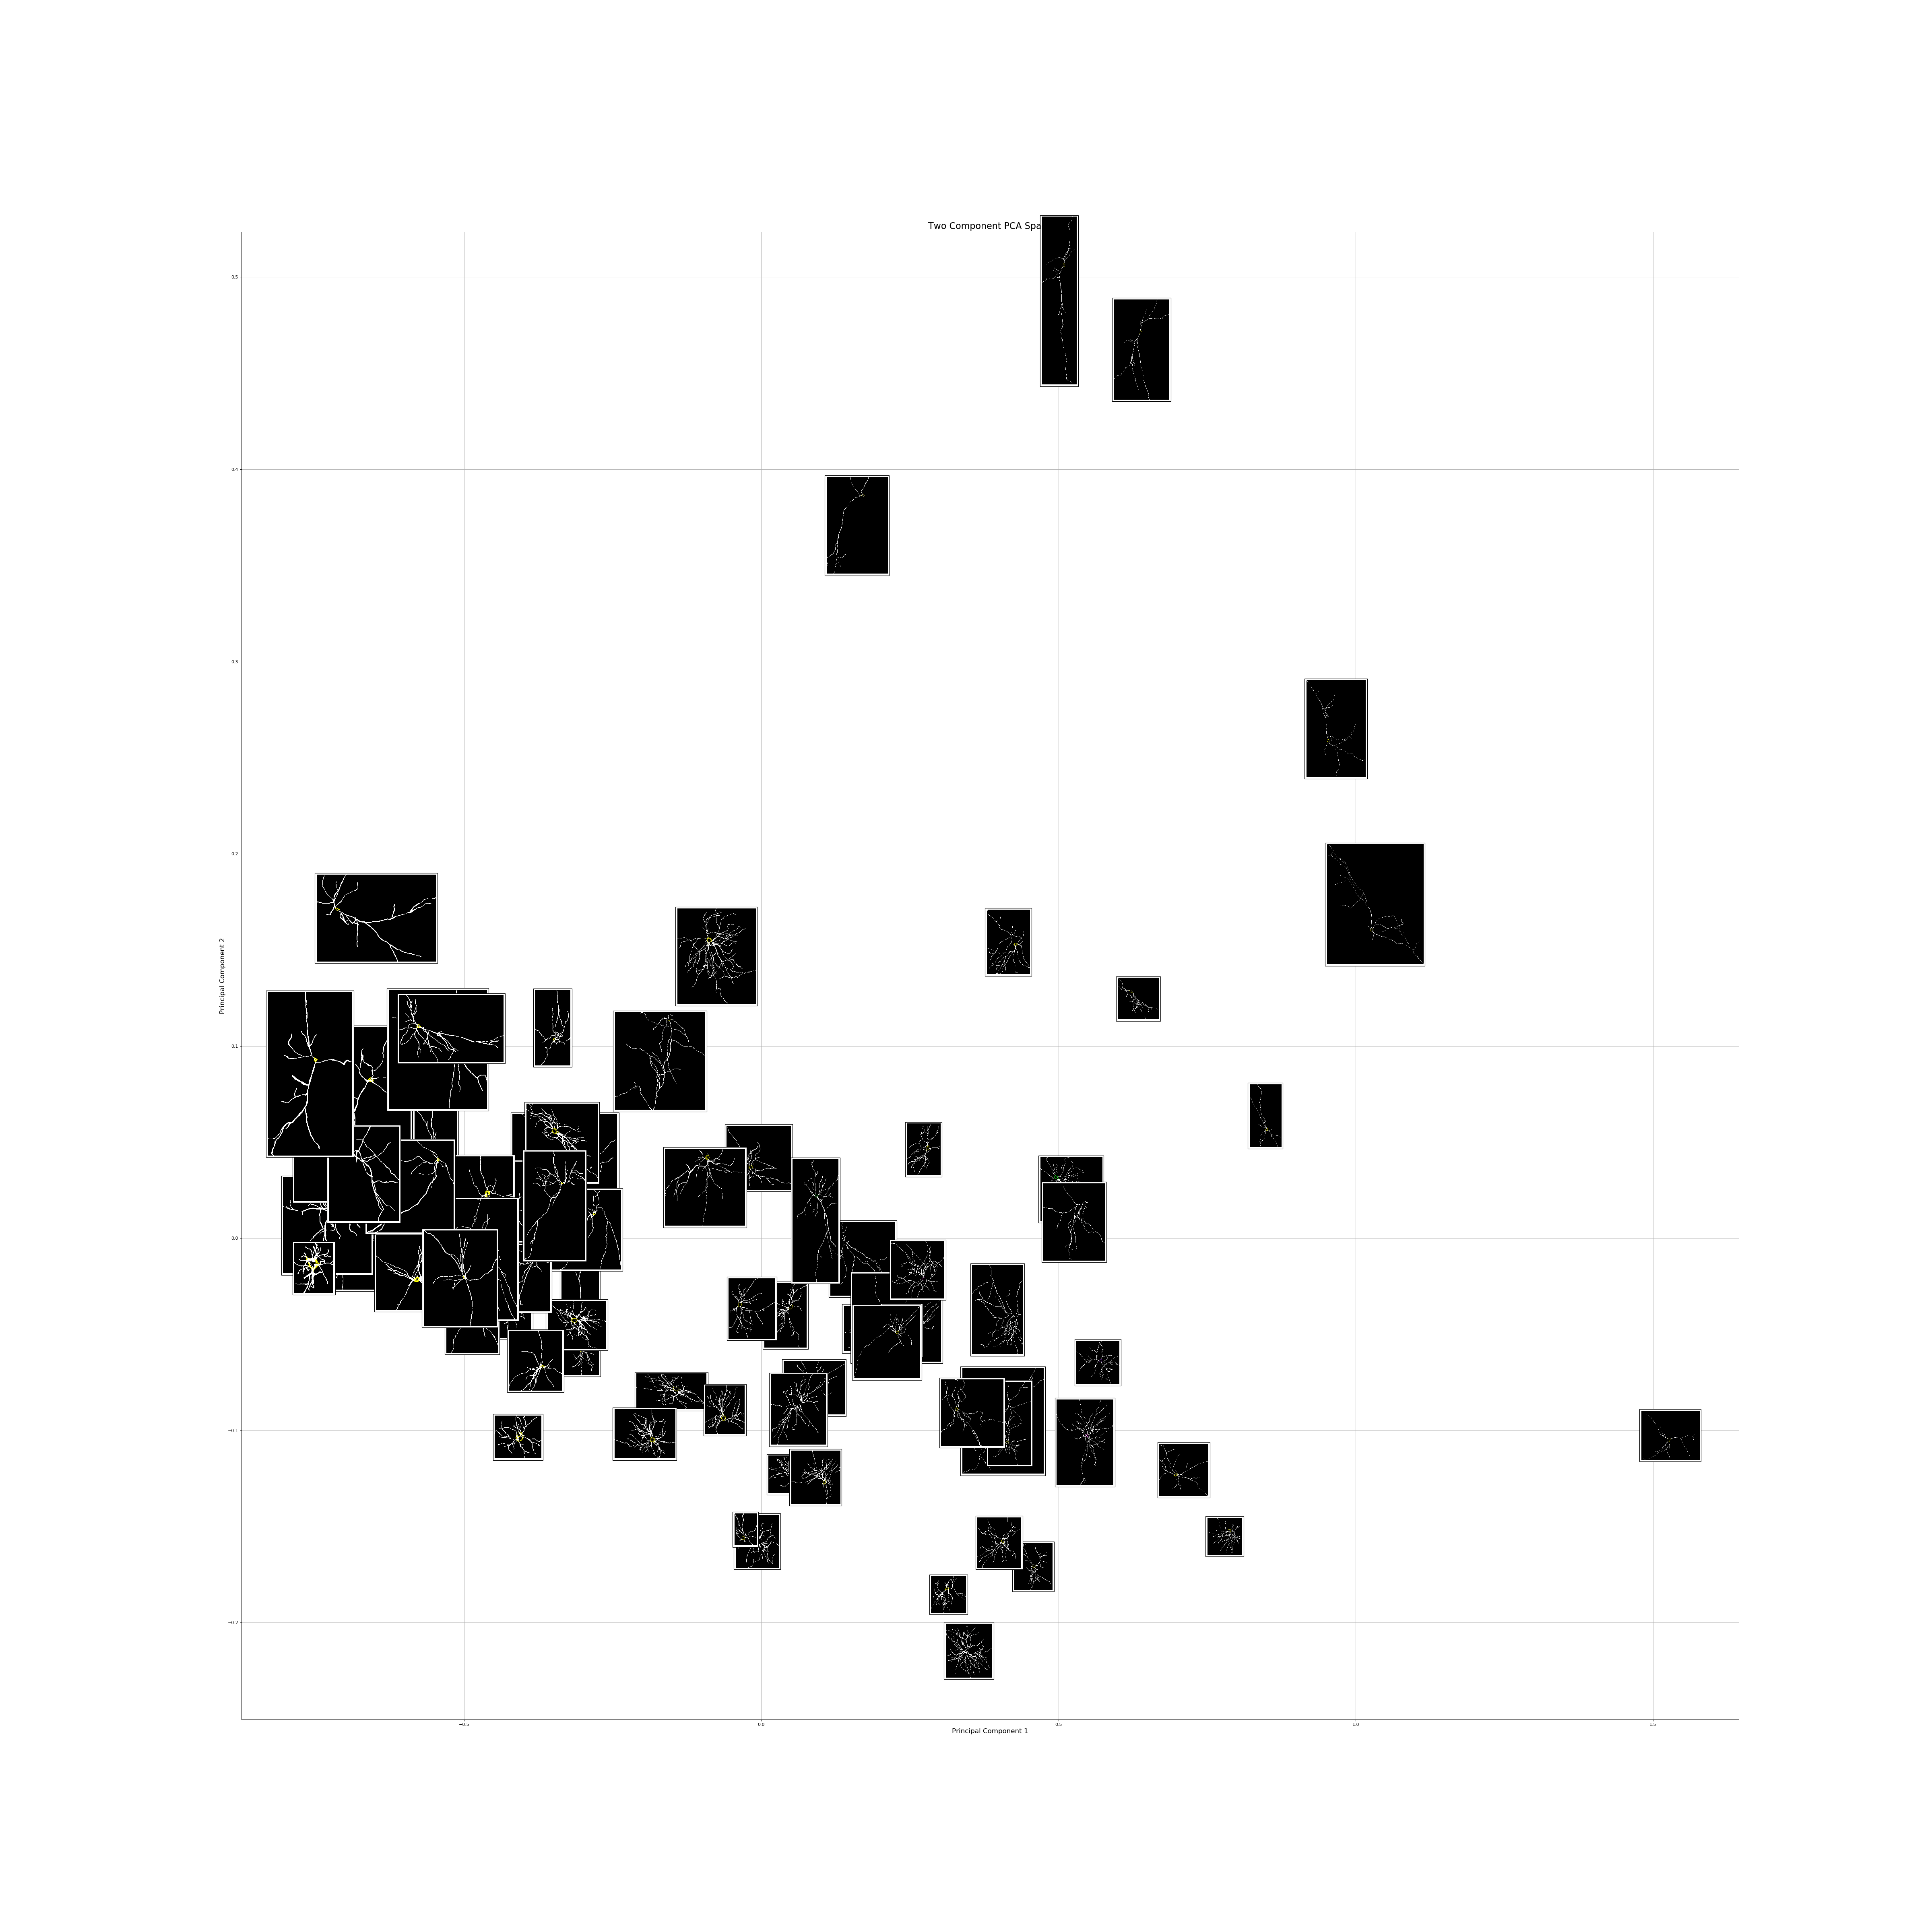

In [14]:
def placeimage(path,x,y):
    arr_hand = read_png(path)
    imagebox = OffsetImage(arr_hand, zoom=.15)
    xy = [x, y]               # coordinates to position this image

    ab = AnnotationBbox(imagebox, xy,
        xybox=(0, 0),
        xycoords='data',
        boxcoords="offset points")                                  
    ax.add_artist(ab)

PC1=np.array(df.loc['PC1'])
PC2=np.array(df.loc['PC2'])

fig, ax = plt.subplots(figsize=(60,60))
plt.scatter(PC1, PC2, color='red')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
for count,i in enumerate(paths):
    placeimage(i,df.iat[0,count],df.iat[1,count])
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Two Component PCA Space', fontsize = 20)
ax.grid()
plt.savefig('E:\Jake\PCA plot with images')

In [5]:
for root,dirs,file in files:
    print(file)